<a href="https://colab.research.google.com/github/bintangfikrif/Unnamed-Final_Project/blob/main/notebooks/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Load Dataset



In [ ]:
try:
    df = pd.read_csv('spatial-metrics-indonesia-remaining_forest_kabupaten.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: File not found. Please ensure the file 'spatial-metrics-indonesia-remaining_forest_kabupaten.csv' exists in the current directory.")
    df = None # Assign None to df in case of error
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,year,country,country_iso2,region,region_trase_id,parent_region,parent_region_trase_id,natural_forest_area_hectares
0,2001,INDONESIA,ID,ACEH BARAT,ID-1107,ACEH,ID-11,215737.764000
1,2001,INDONESIA,ID,ACEH BARAT DAYA,ID-1112,ACEH,ID-11,220655.913176
2,2001,INDONESIA,ID,ACEH BESAR,ID-1108,ACEH,ID-11,251780.389059
3,2001,INDONESIA,ID,ACEH JAYA,ID-1116,ACEH,ID-11,50390.654471
4,2001,INDONESIA,ID,ACEH SELATAN,ID-1103,ACEH,ID-11,710227.314705


## Data Exploration

Memulai Analisis Data Eksploratif (EDA) untuk 'Prediksi Luas Hutan Alam Tersisa di Kabupaten/Kota di Indonesia (2001–2020)'
Mencoba memuat data dari: /content/spatial-metrics-indonesia-remaining_forest_kabupaten.csv
Asumsi kolom kunci: Tahun='year', Wilayah='region', Luas Hutan='natural_forest_area_hectares'
Asumsi kolom provinsi (opsional): 'parent_region'

--- 1. Tinjauan Awal Data ---

(a) 5 Baris Pertama (df.head()):


,year,country,country_iso2,region,region_trase_id,parent_region,parent_region_trase_id,natural_forest_area_hectares
0,2001,INDONESIA,ID,ACEH BARAT,ID-1107,ACEH,ID-11,215737.764000
1,2001,INDONESIA,ID,ACEH BARAT DAYA,ID-1112,ACEH,ID-11,220655.913176
2,2001,INDONESIA,ID,ACEH BESAR,ID-1108,ACEH,ID-11,251780.389059
3,2001,INDONESIA,ID,ACEH JAYA,ID-1116,ACEH,ID-11,50390.654471
4,2001,INDONESIA,ID,ACEH SELATAN,ID-1103,ACEH,ID-11,710227.314705



(b) Bentuk DataFrame (df.shape):
(10758, 8)

(c) Info DataFrame (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10758 entries, 0 to 10757
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          10758 non-null  int64  
 1   country                       10758 non-null  object 
 2   country_iso2                  10758 non-null  object 
 3   region                        10758 non-null  object 
 4   region_trase_id               10758 non-null  object 
 5   parent_region                 10758 non-null  object 
 6   parent_region_trase_id        10758 non-null  object 
 7   natural_forest_area_hectares  10758 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 672.5+ KB

(d) Tipe Data (df.dtypes):
year                              int64
country                          object
country_iso2                     object
region      

,year,natural_forest_area_hectares
count,10758.000000,1.075800e+04
mean,2011.500000,1.881335e+05
std,6.344584,4.533565e+05
min,2001.000000,0.000000e+00
1%,2001.000000,0.000000e+00
5%,2002.000000,0.000000e+00
25%,2006.000000,3.843282e+01
50%,2011.500000,1.264553e+04
75%,2017.000000,1.335595e+05
95%,2021.000000,9.969114e+05



(b) Ringkasan Kolom Kategorikal ('region' dan 'parent_region' jika ada):

Ringkasan untuk 'region':


,region
count,10758
unique,489
top,YOGYAKARTA (KOTA)
freq,22


Jumlah wilayah unik: 489

Ringkasan untuk 'parent_region':


,parent_region
count,10758
unique,34
top,JAWA TIMUR
freq,726


Jumlah provinsi unik: 34

--- 3. Nilai yang Hilang ---
Empty DataFrame
Columns: [Jumlah Hilang, Persentase Hilang]
Index: []

--- 4. Baris Duplikat ---
Jumlah baris duplikat lengkap: 0

--- 5. Analisis Univariat ---

(a) Distribusi Luas Hutan ('natural_forest_area_hectares')


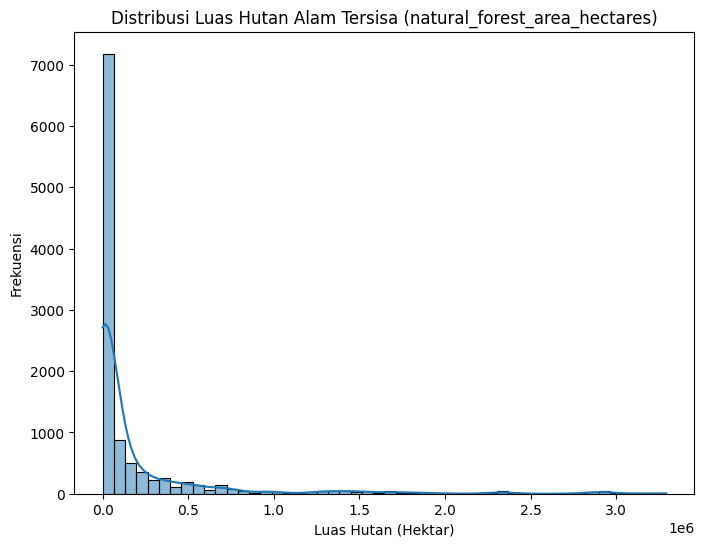

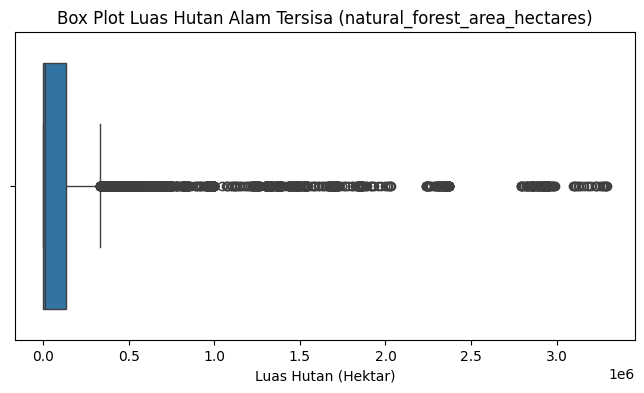


(b) Distribusi Tahun ('year')


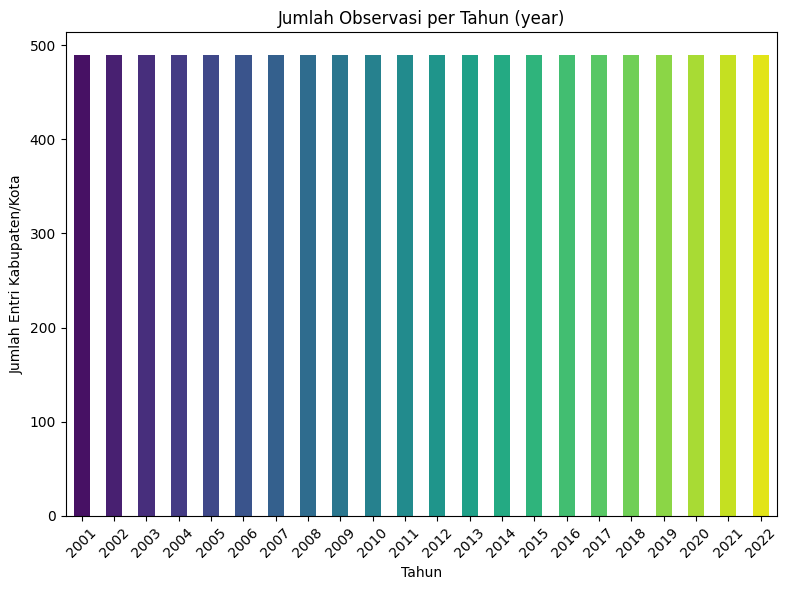

Tahun-tahun yang ada: [np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]
Idealnya, setiap Kabupaten/Kota memiliki entri untuk setiap tahun dari 2001–2020.

(c) Jumlah Data per Wilayah ('region') - N Teratas/Terbawah
Total wilayah unik: 1

10 wilayah teratas berdasarkan jumlah entri data:


,count
region,
YOGYAKARTA (KOTA),22
ACEH BARAT,22
ACEH BARAT DAYA,22
ACEH BESAR,22
ACEH JAYA,22
ACEH SELATAN,22
ACEH SINGKIL,22
ACEH TAMIANG,22
ACEH TENGAH,22



10 wilayah terbawah berdasarkan jumlah entri data:


,count
region,
BALIKPAPAN (KOTA),22
BALANGAN,22
BADUNG,22
ASMAT,22
ASAHAN,22
AMBON (KOTA),22
ALOR,22
AGAM,22
ACEH UTARA,22


Ini dapat membantu mengidentifikasi apakah semua wilayah memiliki titik data yang konsisten sepanjang tahun.

--- 6. Analisis Deret Waktu ---

(a) Tren Keseluruhan Total Luas Hutan di Indonesia (Jumlah dari semua 'region')


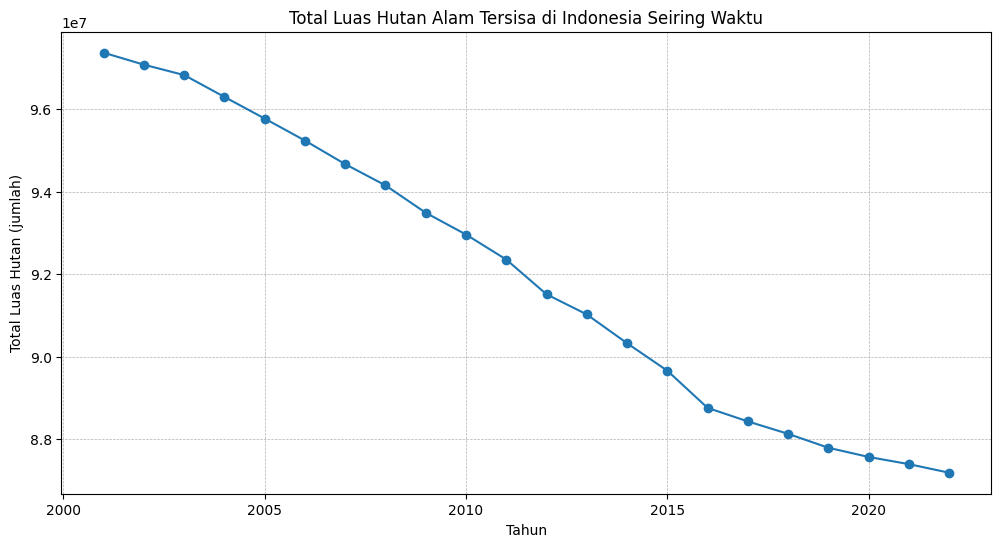


(b) Tren Luas Hutan untuk Sampel Beberapa Wilayah ('region')


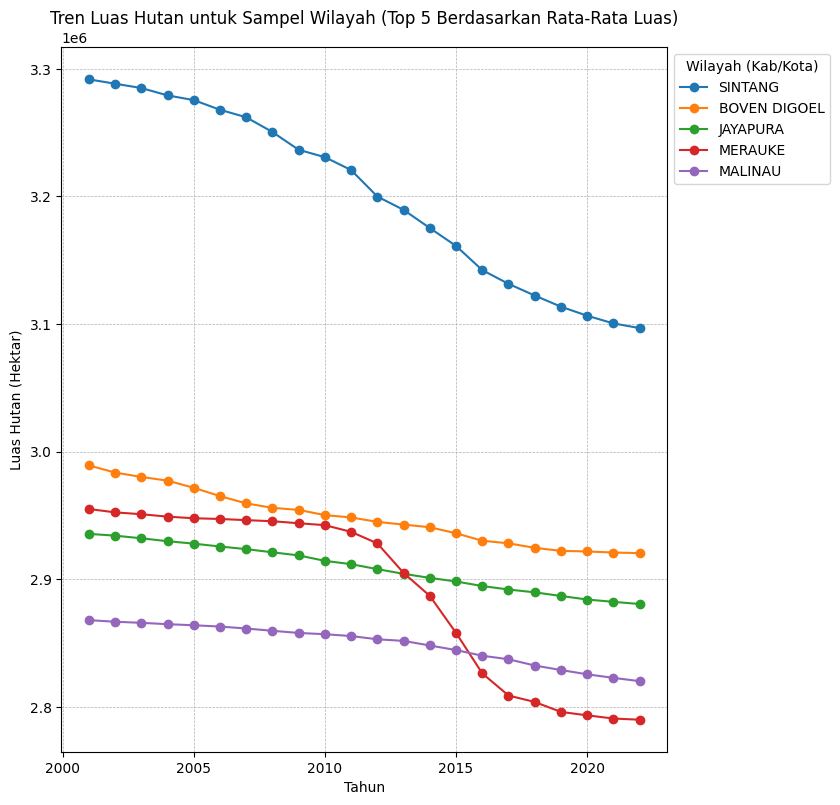

Plot tren untuk wilayah: SINTANG, BOVEN DIGOEL, JAYAPURA, MERAUKE, MALINAU
Pertimbangkan: Apakah tren umumnya menurun? Apakah ada wilayah tertentu dengan perubahan cepat?

(c) Rata-Rata Luas Hutan per Kabupaten/Kota berdasarkan Provinsi ('parent_region') - Tahun Terbaru


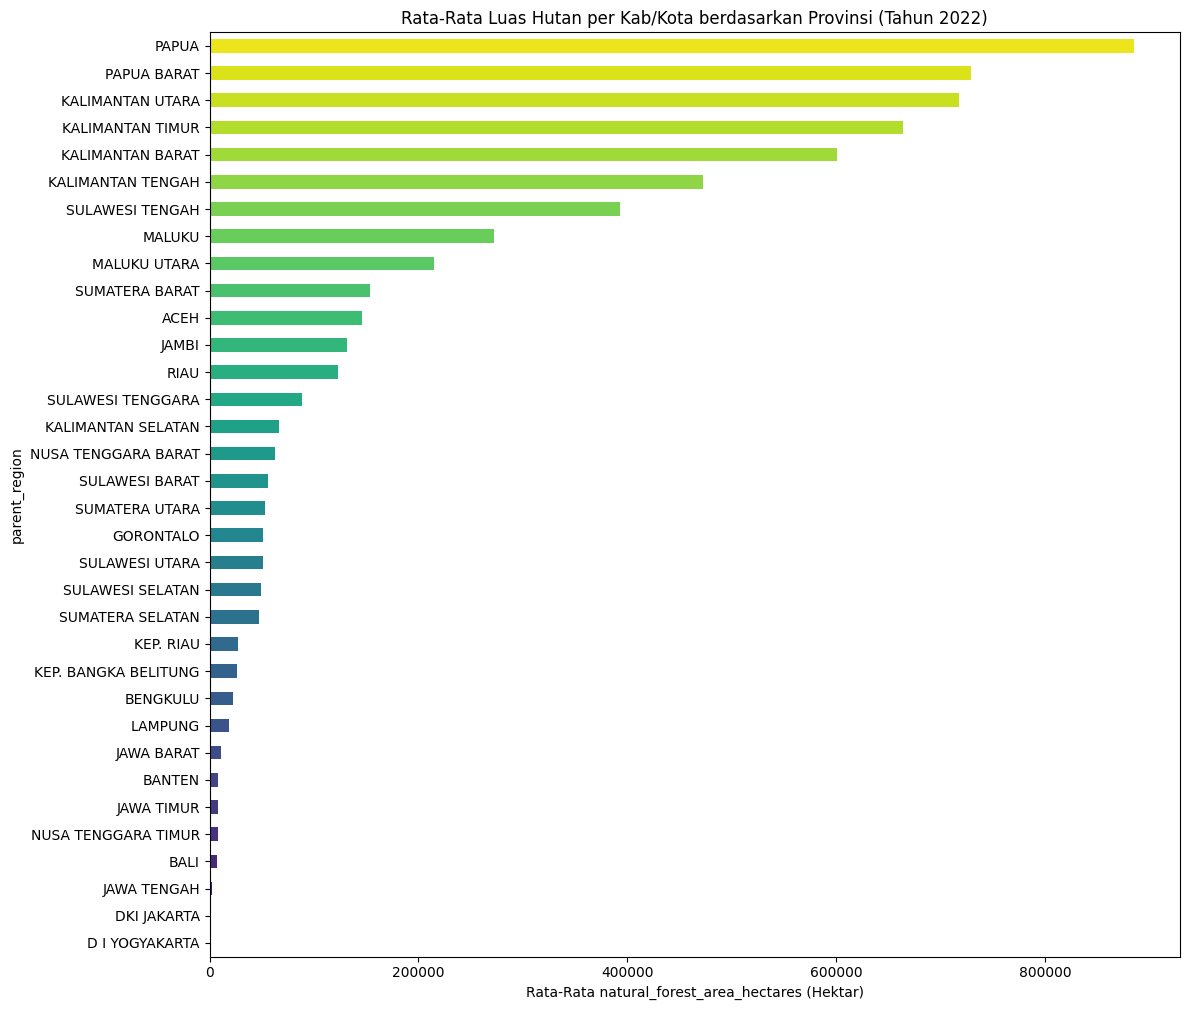


--- 8. Analisis Hubungan: Kolom Numerik vs. Kategorikal ---

(a) Hubungan antara 'natural_forest_area_hectares' dan 'parent_region'

--- Statistik Deskriptif 'natural_forest_area_hectares' per 'parent_region' ---
(Data dari tahun 2022)


,mean,median,std,count
parent_region,,,,
PAPUA,885028.762520,656622.859942,8.876695e+05,28
PAPUA BARAT,728697.680522,615967.308706,6.973770e+05,13
KALIMANTAN UTARA,718102.110842,244186.099059,1.183841e+06,5
KALIMANTAN TIMUR,664245.278071,261197.168470,8.518399e+05,9
KALIMANTAN BARAT,600816.929567,125949.219706,9.866935e+05,14
KALIMANTAN TENGAH,472853.843896,227273.952529,5.762537e+05,14
SULAWESI TENGAH,393356.010922,370244.776942,3.922514e+05,13
MALUKU,272662.823646,183915.897883,3.125204e+05,11
MALUKU UTARA,215410.959071,181885.056353,1.892357e+05,10



--- Box Plot 'natural_forest_area_hectares' per 'parent_region' ---


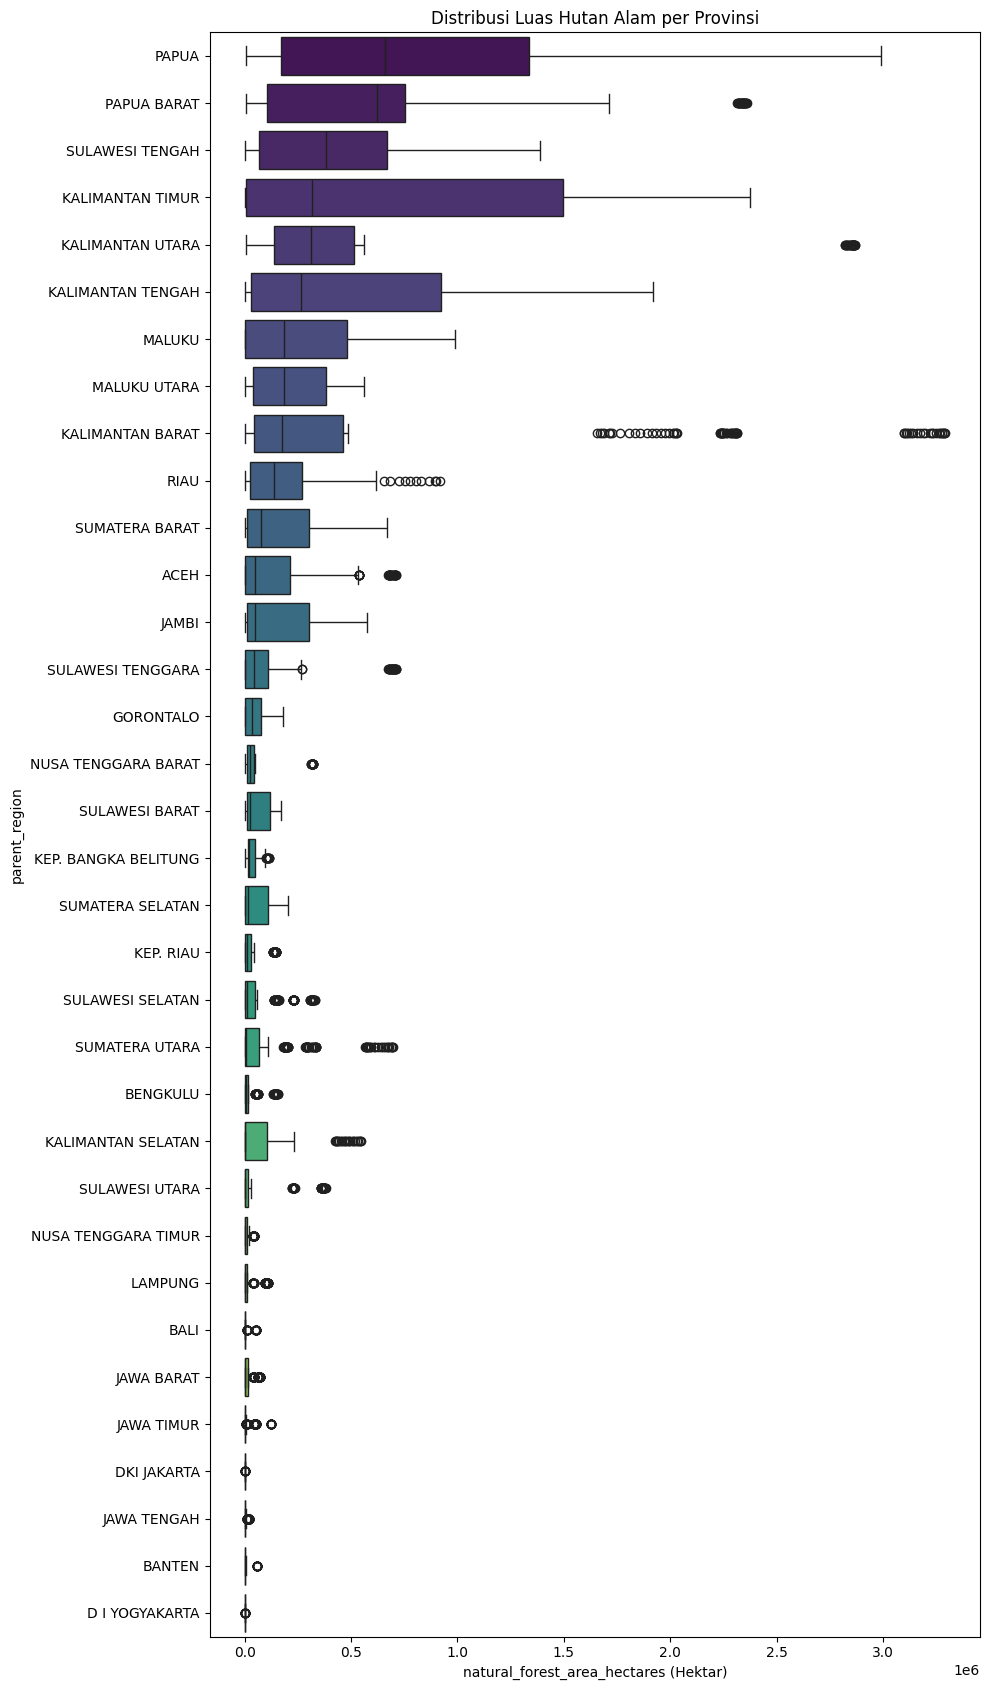

Catatan: Box plot menunjukkan median (garis tengah kotak), kuartil (batas kotak), rentang (kumis), dan pencilan (titik).
Jika sebaran sangat luas (beberapa provinsi sangat besar, lainnya kecil), pertimbangkan menggunakan skala log pada sumbu 'natural_forest_area_hectares'.

(b) Hubungan antara 'natural_forest_area_hectares' dan 'region'

--- Rata-rata 'natural_forest_area_hectares' untuk Wilayah (Kab/Kota) Teratas & Terbawah ---

10 Wilayah (Kab/Kota) dengan Rata-Rata Luas Hutan Tertinggi:


,natural_forest_area_hectares
region,
SINTANG,3.201289e+06
BOVEN DIGOEL,2.948658e+06
JAYAPURA,2.909032e+06
MERAUKE,2.891231e+06
MALINAU,2.849550e+06
KUTAI KARTANEGARA,2.364071e+06
KAIMANA,2.338595e+06
KAPUAS HULU,2.273946e+06
KETAPANG,1.859429e+06



10 Wilayah (Kab/Kota) dengan Rata-Rata Luas Hutan Terendah (tidak termasuk 0 jika ada banyak):


,natural_forest_area_hectares
region,
KEPULAUAN SANGIHE,0.0
SUNGAI PENUH (KOTA),0.0
TEBING TINGGI (KOTA),0.0
TANJUNG PINANG (KOTA),0.0
TANGERANG SELATAN (KOTA),0.0
TANGERANG (KOTA),0.0
TEGAL,0.0
TIMOR TENGAH UTARA,0.0
ALOR,0.0



Catatan: Untuk analisis lebih lanjut per wilayah (Kab/Kota), pertimbangkan memilih beberapa wilayah berdasarkan kriteria tertentu (misalnya, dari provinsi yang sama, atau dengan tren menarik dari analisis deret waktu).

Skrip EDA selesai.


In [ ]:
COL_YEAR = 'year'                            # Nama kolom untuk tahun
COL_REGION = 'region'                        # Nama kolom untuk Kabupaten/Kota
COL_FOREST_AREA = 'natural_forest_area_hectares' # Nama kolom untuk luas hutan alam
COL_PROVINCE = 'parent_region'               # Opsional: Nama kolom untuk provinsi, jika ada

print(f"Memulai Analisis Data Eksploratif (EDA) untuk 'Prediksi Luas Hutan Alam Tersisa di Kabupaten/Kota di Indonesia (2001–2020)'")
print(f"Mencoba memuat data dari: {'/content/spatial-metrics-indonesia-remaining_forest_kabupaten.csv'}")
print(f"Asumsi kolom kunci: Tahun='{COL_YEAR}', Wilayah='{COL_REGION}', Luas Hutan='{COL_FOREST_AREA}'")
if COL_PROVINCE:
    print(f"Asumsi kolom provinsi (opsional): '{COL_PROVINCE}'")

# --- EDA Utama ---
if df is not None:

    # 1. Tinjauan Awal Data
    print("\n--- 1. Tinjauan Awal Data ---")
    print("\n(a) 5 Baris Pertama (df.head()):")
    display(df.head())

    print("\n(b) Bentuk DataFrame (df.shape):")
    print(df.shape)

    print("\n(c) Info DataFrame (df.info()):")
    df.info()

    print("\n(d) Tipe Data (df.dtypes):")
    print(df.dtypes)

    print("\n(e) Nama Kolom (df.columns):")
    print(df.columns)

    # --- Pemeriksaan Tipe Data dan Konversi Potensial ---
    # Pastikan kolom kunci ada sebelum melanjutkan dengan EDA spesifik untuk mereka
    key_cols_present = True
    # Menggunakan zip untuk mencocokkan nama deskriptif dengan variabel kolom
    for nama_deskriptif, nama_variabel_kolom in zip(
        ['Tahun', 'Wilayah (Kab/Kota)', 'Luas Hutan Alam'],
        [COL_YEAR, COL_REGION, COL_FOREST_AREA]
    ):
        if nama_variabel_kolom not in df.columns:
            print(f"ERROR: Asumsi kolom kunci untuk {nama_deskriptif} ('{nama_variabel_kolom}') tidak ditemukan dalam DataFrame. Harap periksa nama kolom.")
            key_cols_present = False

    if COL_PROVINCE and COL_PROVINCE not in df.columns: # Periksa kolom provinsi opsional
        print(f"PERINGATAN: Kolom provinsi opsional ('{COL_PROVINCE}') tidak ditemukan. Melanjutkan tanpa kolom ini.")
        # COL_PROVINCE = None # Baris ini bisa diaktifkan jika ingin menonaktifkan COL_PROVINCE secara eksplisit jika tidak ada

    if not key_cols_present:
        print("\nMenghentikan EDA lebih lanjut karena ada kolom kunci yang hilang. Harap perbaiki variabel COL_ di bagian atas skrip berdasarkan 'NAMA-NAMA KOLOM AKTUAL' yang dicetak sebelumnya.")
    else:
        # Konversi tahun ke integer jika belum (umum untuk deret waktu)
        # Juga periksa apakah tipe datanya bukan numerik sebelum mencoba konversi
        if df[COL_YEAR].dtype != 'int64' and not pd.api.types.is_numeric_dtype(df[COL_YEAR].dtype):
            try:
                df[COL_YEAR] = pd.to_numeric(df[COL_YEAR], errors='coerce') # Coerce akan membuat non-numerik menjadi NaN
                print(f"\nMengkonversi '{COL_YEAR}' menjadi numerik.")
                if df[COL_YEAR].isnull().any():
                    print(f"Peringatan: Beberapa nilai di '{COL_YEAR}' tidak dapat dikonversi menjadi numerik dan sekarang menjadi NaN.")
            except Exception as e:
                print(f"Tidak dapat mengkonversi '{COL_YEAR}' menjadi numerik: {e}")

        # Pastikan luas hutan adalah numerik
        # Memeriksa tipe data bukan numerik sebelum mencoba konversi
        if df[COL_FOREST_AREA].dtype not in ['int64', 'float64'] and not pd.api.types.is_numeric_dtype(df[COL_FOREST_AREA].dtype):
            try:
                # Coba hapus koma (jika ada sebagai pemisah ribuan) dan konversi ke numerik
                df[COL_FOREST_AREA] = df[COL_FOREST_AREA].astype(str).str.replace(',', '', regex=False)
                df[COL_FOREST_AREA] = pd.to_numeric(df[COL_FOREST_AREA], errors='coerce')
                print(f"\nMengkonversi '{COL_FOREST_AREA}' menjadi numerik (setelah mencoba menghapus koma).")
                if df[COL_FOREST_AREA].isnull().any():
                    print(f"Peringatan: Beberapa nilai di '{COL_FOREST_AREA}' tidak dapat dikonversi menjadi numerik dan sekarang menjadi NaN.")
            except Exception as e:
                print(f"Tidak dapat mengkonversi '{COL_FOREST_AREA}' menjadi numerik: {e}")

        # Konversi wilayah (dan provinsi jika ada dan ditemukan) ke string/kategori
        df[COL_REGION] = df[COL_REGION].astype(str)
        if COL_PROVINCE and COL_PROVINCE in df.columns: # Periksa lagi apakah benar-benar ada di kolom
            df[COL_PROVINCE] = df[COL_PROVINCE].astype(str)


        # 2. Statistik Deskriptif
        print("\n--- 2. Statistik Deskriptif ---")
        print("\n(a) Kolom Numerik (df.describe()):")
        # Pilih hanya kolom numerik untuk describe untuk menghindari peringatan
        display(df.select_dtypes(include=np.number).describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]))

        print(f"\n(b) Ringkasan Kolom Kategorikal ('{COL_REGION}' dan '{COL_PROVINCE}' jika ada):")
        if COL_REGION in df.columns:
            print(f"\nRingkasan untuk '{COL_REGION}':")
            display(df[COL_REGION].describe())
            print(f"Jumlah wilayah unik: {df[COL_REGION].nunique()}")
        if COL_PROVINCE and COL_PROVINCE in df.columns:
            print(f"\nRingkasan untuk '{COL_PROVINCE}':")
            display(df[COL_PROVINCE].describe())
            print(f"Jumlah provinsi unik: {df[COL_PROVINCE].nunique()}")


        # 3. Nilai yang Hilang (Missing Values)
        print("\n--- 3. Nilai yang Hilang ---")
        missing_values = df.isnull().sum()
        missing_percentage = (missing_values / len(df)) * 100
        missing_df = pd.DataFrame({'Jumlah Hilang': missing_values, 'Persentase Hilang': missing_percentage})
        print(missing_df[missing_df['Jumlah Hilang'] > 0]) # Hanya cetak kolom dengan nilai hilang

        if missing_values.sum() > 0: # Hanya plot jika ada nilai yang hilang
            plt.figure(figsize=(12, 7))
            sns.heatmap(df.isnull(), cbar=True, cmap='viridis_r', yticklabels=False)
            plt.title('Peta Panas (Heatmap) Nilai yang Hilang')
            plt.show()


        # 4. Baris Duplikat
        print("\n--- 4. Baris Duplikat ---")
        num_duplicates = df.duplicated().sum()
        print(f"Jumlah baris duplikat lengkap: {num_duplicates}")
        if num_duplicates > 0:
            print("Pertimbangkan untuk menyelidiki duplikat ini. Untuk data deret waktu, duplikat untuk wilayah dan tahun yang sama mungkin bermasalah.")
            # display(df[df.duplicated(keep=False)].sort_values(by=[COL_REGION, COL_YEAR])) # Menampilkan semua kemunculan duplikat


        # 5. Analisis Univariat (Fokus pada Kolom Kunci)
        print("\n--- 5. Analisis Univariat ---")

        # (a) Distribusi Luas Hutan
        print(f"\n(a) Distribusi Luas Hutan ('{COL_FOREST_AREA}')")
        plt.figure(figsize=(8, 6))
        sns.histplot(df[COL_FOREST_AREA].dropna(), kde=True, bins=50)
        plt.title(f'Distribusi Luas Hutan Alam Tersisa ({COL_FOREST_AREA})')
        plt.xlabel('Luas Hutan (Hektar)')
        plt.ylabel('Frekuensi')
        plt.show()

        print("\n")

        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[COL_FOREST_AREA].dropna())
        plt.title(f'Box Plot Luas Hutan Alam Tersisa ({COL_FOREST_AREA})')
        plt.xlabel('Luas Hutan (Hektar)')
        plt.show()

        # (b) Distribusi Tahun
        print(f"\n(b) Distribusi Tahun ('{COL_YEAR}')")
        # Periksa apakah kolom ada dan semua nilainya tidak NaN setelah konversi potensial
        if COL_YEAR in df.columns and df[COL_YEAR].notna().all():
            year_counts = df[COL_YEAR].value_counts().sort_index()
            plt.figure(figsize=(8, 6))
            # Menggunakan palet warna yang berbeda untuk setiap bar
            year_counts.plot(kind='bar', color=sns.color_palette("viridis", len(year_counts)))
            plt.title(f'Jumlah Observasi per Tahun ({COL_YEAR})')
            plt.xlabel('Tahun')
            plt.ylabel('Jumlah Entri Kabupaten/Kota')
            plt.xticks(rotation=45)
            plt.tight_layout() # Menyesuaikan layout agar label tidak tumpang tindih
            plt.show()
            print(f"Tahun-tahun yang ada: {sorted(df[COL_YEAR].unique())}")
            print("Idealnya, setiap Kabupaten/Kota memiliki entri untuk setiap tahun dari 2001–2020.")
        else:
            print(f"Tidak dapat membuat plot distribusi tahun. Periksa apakah kolom '{COL_YEAR}' ada dan memiliki data numerik yang valid.")

        # (c) Jumlah Data per Wilayah (Kabupaten/Kota) - N Teratas/Terbawah
        print(f"\n(c) Jumlah Data per Wilayah ('{COL_REGION}') - N Teratas/Terbawah")
        if COL_REGION in df.columns:
            region_counts = df[COL_REGION].value_counts()
            print(f"Total wilayah unik: {region_counts.nunique()}")
            print("\n10 wilayah teratas berdasarkan jumlah entri data:")
            display(region_counts.head(10))
            if len(region_counts) > 10:
                print("\n10 wilayah terbawah berdasarkan jumlah entri data:")
                display(region_counts.tail(10))
            print("Ini dapat membantu mengidentifikasi apakah semua wilayah memiliki titik data yang konsisten sepanjang tahun.")


        # 6. Analisis Deret Waktu (EDA Kunci untuk Proyek Anda)
        print("\n--- 6. Analisis Deret Waktu ---")

        # (a) Tren Keseluruhan Total Luas Hutan di Indonesia
        if COL_YEAR in df.columns and COL_FOREST_AREA in df.columns:
            print(f"\n(a) Tren Keseluruhan Total Luas Hutan di Indonesia (Jumlah dari semua '{COL_REGION}')")
            total_forest_per_year = df.groupby(COL_YEAR)[COL_FOREST_AREA].sum(numeric_only=True) # numeric_only=True untuk groupby sum
            plt.figure(figsize=(12, 6))
            total_forest_per_year.plot(marker='o', linestyle='-')
            plt.title('Total Luas Hutan Alam Tersisa di Indonesia Seiring Waktu')
            plt.xlabel('Tahun')
            plt.ylabel('Total Luas Hutan (jumlah)')
            plt.grid(True, which='both', linestyle='--', linewidth=0.5)
            plt.show()
        else:
            print(f"Tidak dapat membuat plot tren keseluruhan. Pastikan '{COL_YEAR}' dan '{COL_FOREST_AREA}' valid.")

        # (b) Tren Luas Hutan untuk Sampel Beberapa Wilayah (Kabupaten/Kota)
        if COL_REGION in df.columns and COL_YEAR in df.columns and COL_FOREST_AREA in df.columns:
            print(f"\n(b) Tren Luas Hutan untuk Sampel Beberapa Wilayah ('{COL_REGION}')")
            unique_regions = df[COL_REGION].unique()
            sample_size = min(5, len(unique_regions)) # Plot untuk maksimal 5 wilayah

            if sample_size > 0:
                # Memilih wilayah dengan titik data terbanyak atau luas hutan terkini tertinggi untuk visualisasi yang lebih baik
                avg_forest_per_region = df.groupby(COL_REGION)[COL_FOREST_AREA].mean().nlargest(sample_size).index
                sample_regions = avg_forest_per_region

                plt.figure(figsize=(10, 8))
                for region_name in sample_regions: # Mengganti nama variabel 'region' menjadi 'region_name' untuk menghindari konflik dengan modul
                    region_df = df[df[COL_REGION] == region_name].sort_values(by=COL_YEAR)
                    plt.plot(region_df[COL_YEAR], region_df[COL_FOREST_AREA], marker='o', linestyle='-', label=region_name)

                plt.title(f'Tren Luas Hutan untuk Sampel Wilayah (Top {sample_size} Berdasarkan Rata-Rata Luas)')
                plt.xlabel('Tahun')
                plt.ylabel('Luas Hutan (Hektar)')
                plt.legend(title='Wilayah (Kab/Kota)', loc='upper left', bbox_to_anchor=(1, 1)) # Legenda di luar plot
                plt.grid(True, which='both', linestyle='--', linewidth=0.5)
                plt.tight_layout(rect=[0, 0, 0.85, 1]) # Sesuaikan layout untuk memberi ruang bagi legenda
                plt.show()

                print(f"Plot tren untuk wilayah: {', '.join(sample_regions)}")
                print("Pertimbangkan: Apakah tren umumnya menurun? Apakah ada wilayah tertentu dengan perubahan cepat?")
            else:
                print("Tidak cukup wilayah unik untuk dijadikan sampel plot tren.")
        else:
            print(f"Tidak dapat membuat plot tren regional. Pastikan '{COL_REGION}', '{COL_YEAR}', dan '{COL_FOREST_AREA}' valid.")


        # (c) Distribusi Luas Hutan berdasarkan Provinsi (jika kolom provinsi ada)
        if COL_PROVINCE and COL_PROVINCE in df.columns and COL_FOREST_AREA in df.columns:
            print(f"\n(c) Rata-Rata Luas Hutan per Kabupaten/Kota berdasarkan Provinsi ('{COL_PROVINCE}') - Tahun Terbaru")
            if COL_YEAR in df.columns and df[COL_YEAR].notna().any(): # Pastikan kolom tahun valid
                most_recent_year = df[df[COL_YEAR].notna()][COL_YEAR].max() # Ambil tahun terbaru dari data yang tidak NaN
                df_recent = df[df[COL_YEAR] == most_recent_year]

                # Pastikan kolom forest area adalah numerik sebelum groupby
                if pd.api.types.is_numeric_dtype(df_recent[COL_FOREST_AREA]):
                    avg_forest_by_province = df_recent.groupby(COL_PROVINCE)[COL_FOREST_AREA].mean().sort_values(ascending=False)

                    if not avg_forest_by_province.empty:
                        plt.figure(figsize=(12, max(8, len(avg_forest_by_province) * 0.3))) # Tinggi dinamis
                        # Menggunakan palet warna yang berbeda untuk setiap bar
                        avg_forest_by_province.plot(kind='barh', color=sns.color_palette("viridis_r", len(avg_forest_by_province)))
                        plt.title(f'Rata-Rata Luas Hutan per Kab/Kota berdasarkan Provinsi (Tahun {int(most_recent_year)})')
                        plt.xlabel(f'Rata-Rata {COL_FOREST_AREA} (Hektar)')
                        plt.ylabel(COL_PROVINCE)
                        plt.gca().invert_yaxis() # Tampilkan yang tertinggi di atas
                        plt.tight_layout()
                        plt.show()
                    else:
                        print(f"Tidak ada data yang tersedia untuk tahun terbaru ({int(most_recent_year)}) untuk diplot berdasarkan provinsi.")
                else:
                    print(f"Kolom '{COL_FOREST_AREA}' bukan numerik setelah penyaringan tahun terbaru. Tidak dapat menghitung rata-rata.")
            else:
                print(f"Tidak dapat membuat plot berdasarkan provinsi karena data '{COL_YEAR}' hilang atau tidak valid.")
        elif COL_PROVINCE: # Jika COL_PROVINCE didefinisikan tapi tidak ditemukan di df.columns
             print(f"Melewati plot rata-rata luas hutan berdasarkan provinsi karena kolom '{COL_PROVINCE}' tidak ditemukan atau ada dependensi lain yang hilang.")

        # --- 8. Analisis Hubungan: Kolom Numerik vs. Kategorikal ---
        print("\n--- 8. Analisis Hubungan: Kolom Numerik vs. Kategorikal ---")

        # Pastikan kolom-kolom yang relevan ada dan valid sebelum melanjutkan
        if df is not None and COL_FOREST_AREA in df.columns:

            # (a) Hubungan antara Luas Hutan Alam dan Provinsi (COL_PROVINCE)
            if COL_PROVINCE and COL_PROVINCE in df.columns:
                print(f"\n(a) Hubungan antara '{COL_FOREST_AREA}' dan '{COL_PROVINCE}'")

                # 1. Statistik Deskriptif Luas Hutan per Provinsi
                print(f"\n--- Statistik Deskriptif '{COL_FOREST_AREA}' per '{COL_PROVINCE}' ---")
                # Kita bisa fokus pada rata-rata dan median untuk perbandingan awal
                # Menggunakan data tahun terbaru bisa lebih relevan untuk perbandingan antar provinsi saat ini
                if COL_YEAR in df.columns and df[COL_YEAR].notna().any():
                    most_recent_year = df[df[COL_YEAR].notna()][COL_YEAR].max()
                    df_recent_province = df[df[COL_YEAR] == most_recent_year]

                    # Pastikan kolom forest area adalah numerik
                    if pd.api.types.is_numeric_dtype(df_recent_province[COL_FOREST_AREA]):
                        forest_stats_by_province = df_recent_province.groupby(COL_PROVINCE)[COL_FOREST_AREA].agg(['mean', 'median', 'std', 'count']).sort_values(by='mean', ascending=False)
                        print(f"(Data dari tahun {int(most_recent_year)})")
                        display(forest_stats_by_province)
                    else:
                        print(f"Kolom '{COL_FOREST_AREA}' bukan numerik. Tidak dapat menghitung statistik grup.")
                else:
                    print(f"Tidak dapat menghitung statistik per provinsi karena data '{COL_YEAR}' tidak valid atau tidak ada.")


                # 2. Visualisasi: Box Plot Luas Hutan per Provinsi
                print(f"\n--- Box Plot '{COL_FOREST_AREA}' per '{COL_PROVINCE}' ---")
                # Menggunakan semua data (tidak hanya tahun terbaru) untuk melihat distribusi keseluruhan per provinsi
                if pd.api.types.is_numeric_dtype(df[COL_FOREST_AREA]):
                    plt.figure(figsize=(10, max(10, len(df[COL_PROVINCE].unique()) * 0.5))) # Ukuran dinamis
                    # Urutkan provinsi berdasarkan median luas hutan untuk tampilan yang lebih rapi
                    sorted_provinces = df.groupby(COL_PROVINCE)[COL_FOREST_AREA].median().sort_values(ascending=False).index
                    sns.boxplot(y=COL_PROVINCE, x=COL_FOREST_AREA, data=df, order=sorted_provinces, palette="viridis")
                    plt.title(f'Distribusi Luas Hutan Alam per Provinsi')
                    plt.xlabel(f'{COL_FOREST_AREA} (Hektar)')
                    plt.ylabel(f'{COL_PROVINCE}')
                    plt.tight_layout()
                    plt.show()
                    print(f"Catatan: Box plot menunjukkan median (garis tengah kotak), kuartil (batas kotak), rentang (kumis), dan pencilan (titik).")
                    print(f"Jika sebaran sangat luas (beberapa provinsi sangat besar, lainnya kecil), pertimbangkan menggunakan skala log pada sumbu '{COL_FOREST_AREA}'.")
                else:
                    print(f"Tidak dapat membuat box plot karena '{COL_FOREST_AREA}' bukan numerik.")

            else:
                print(f"\nKolom '{COL_PROVINCE}' tidak valid atau tidak ditemukan. Analisis dengan provinsi dilewati.")


            # (b) Hubungan antara Luas Hutan Alam dan Wilayah (Kabupaten/Kota - COL_REGION)
            if COL_REGION and COL_REGION in df.columns:
                print(f"\n(b) Hubungan antara '{COL_FOREST_AREA}' dan '{COL_REGION}'")

                # 1. Rata-rata Luas Hutan untuk N Wilayah Teratas dan Terbawah
                print(f"\n--- Rata-rata '{COL_FOREST_AREA}' untuk Wilayah (Kab/Kota) Teratas & Terbawah ---")
                # Menggunakan rata-rata dari semua tahun per wilayah
                if pd.api.types.is_numeric_dtype(df[COL_FOREST_AREA]): # Pastikan numerik
                    mean_forest_by_region = df.groupby(COL_REGION)[COL_FOREST_AREA].mean().sort_values(ascending=False)

                    print("\n10 Wilayah (Kab/Kota) dengan Rata-Rata Luas Hutan Tertinggi:")
                    display(mean_forest_by_region.head(10))

                    if len(mean_forest_by_region) > 10:
                        print("\n10 Wilayah (Kab/Kota) dengan Rata-Rata Luas Hutan Terendah (tidak termasuk 0 jika ada banyak):")
                        # Filter yang bukan 0 untuk terbawah jika ingin melihat yang 'masih ada' tapi kecil
                        # display(mean_forest_by_region[mean_forest_by_region > 0].tail(10))
                        display(mean_forest_by_region.tail(10)) # Tampilkan 10 terbawah termasuk 0
                else:
                    print(f"Tidak dapat menghitung rata-rata per wilayah karena '{COL_FOREST_AREA}' bukan numerik.")

                print("\nCatatan: Untuk analisis lebih lanjut per wilayah (Kab/Kota), pertimbangkan memilih beberapa wilayah berdasarkan kriteria tertentu (misalnya, dari provinsi yang sama, atau dengan tren menarik dari analisis deret waktu).")

            else:
                print(f"\nKolom '{COL_REGION}' tidak valid atau tidak ditemukan. Analisis dengan wilayah (Kab/Kota) dilewati.")

        else:
            print(f"\nTidak dapat melakukan analisis numerik vs. kategorikal karena DataFrame 'df' tidak dimuat atau '{COL_FOREST_AREA}' tidak ditemukan.")

else:
    print("\nEDA tidak dapat dilakukan karena DataFrame 'df' adalah None (file mungkin tidak berhasil dimuat).")

print("\nSkrip EDA selesai.")

### Cek Kelengkapan Wilayah

In [ ]:
# Pastikan df tidak None sebelum melanjutkan
if df is not None:
    # Hapus duplikat
    initial_rows = len(df)
    df = df.drop_duplicates(subset=['year', 'region'])
    rows_after_dropping = len(df)
    print(f"Setelah hapus duplikat: {rows_after_dropping} baris")

    if initial_rows == rows_after_dropping:
        print("Tidak ada duplikat yang terhapus berdasarkan 'year' dan 'region'.")
    else:
        print(f"Jumlah duplikat yang terhapus: {initial_rows - rows_after_dropping} baris.")

    # Info dasar
    years = sorted(df['year'].unique())
    total_kabupaten = df['region'].nunique()

    print(f"Tahun: {years[0]} - {years[-1]} ({len(years)} tahun)")
    print(f"Total kabupaten unik: {total_kabupaten}")

    # Cek kelengkapan per tahun
    print(f"\nKELENGKAPAN PER TAHUN:")
    print("Tahun | Kabupaten | Status")
    print("-" * 25)

    incomplete_years = []
    for year in years:
        count = len(df[df['year'] == year])
        status = "Lengkap" if count == total_kabupaten else f"Kurang {total_kabupaten - count}"
        print(f"{year} | {count:8} | {status}")

        if count != total_kabupaten:
            incomplete_years.append(year)

    # Summary
    complete_years = len(years) - len(incomplete_years)
    print(f"\n RINGKASAN:")
    print(f"• Tahun lengkap: {complete_years}/{len(years)}")
    print(f"• Tahun tidak lengkap: {len(incomplete_years)}")

    if incomplete_years:
        print(f"• Tahun bermasalah: {incomplete_years}")

        # Cek kabupaten yang sering hilang
        all_kabupaten = set(df['region'].unique())
        missing_freq = {}

        for year in incomplete_years:
            year_kabupaten = set(df[df['year'] == year]['region'].unique())
            missing = all_kabupaten - year_kabupaten

            for kab in missing:
                missing_freq[kab] = missing_freq.get(kab, 0) + 1

        # Tampilkan 5 yang paling sering hilang
        frequent_missing = sorted(missing_freq.items(), key=lambda x: x[1], reverse=True)[:5]

        if frequent_missing:
            print(f"\n🔍 KABUPATEN YANG SERING HILANG:")
            for kab, freq in frequent_missing:
                print(f"• {kab}: hilang di {freq} tahun")

    else:
        print(" Semua tahun lengkap!")

Setelah hapus duplikat: 10758 baris
Tidak ada duplikat yang terhapus berdasarkan 'year' dan 'region'.
Tahun: 2001 - 2022 (22 tahun)
Total kabupaten unik: 489

KELENGKAPAN PER TAHUN:
Tahun | Kabupaten | Status
-------------------------
2001 |      489 | Lengkap
2002 |      489 | Lengkap
2003 |      489 | Lengkap
2004 |      489 | Lengkap
2005 |      489 | Lengkap
2006 |      489 | Lengkap
2007 |      489 | Lengkap
2008 |      489 | Lengkap
2009 |      489 | Lengkap
2010 |      489 | Lengkap
2011 |      489 | Lengkap
2012 |      489 | Lengkap
2013 |      489 | Lengkap
2014 |      489 | Lengkap
2015 |      489 | Lengkap
2016 |      489 | Lengkap
2017 |      489 | Lengkap
2018 |      489 | Lengkap
2019 |      489 | Lengkap
2020 |      489 | Lengkap
2021 |      489 | Lengkap
2022 |      489 | Lengkap

 RINGKASAN:
• Tahun lengkap: 22/22
• Tahun tidak lengkap: 0
 Semua tahun lengkap!


### Mengecek pesebaran nilai 0

Jumlah dan Persentase Nol: Apakah jumlah nilai 0 signifikan? Jika sangat kecil, mungkin itu memang kondisi aktual. Jika besar, perlu penyelidikan lebih lanjut.
Distribusi Tahun: Apakah nilai 0 tersebar merata di semua tahun, atau terkonsentrasi pada tahun-tahun tertentu? Konsentrasi di tahun-tahun awal atau akhir bisa menandakan isu dalam metode pengumpulan data pada periode tersebut.
Distribusi Wilayah: Apakah nilai 0 terkonsentrasi di wilayah tertentu? Jika ya, mungkin ada karakteristik spesifik wilayah tersebut atau masalah data yang terkait dengan wilayah tersebut.

Pola dalam Trend Per Wilayah: Lihat plot garis per wilayah sampel. Apakah ada penurunan bertahap menuju 0, atau penurunan mendadak? Penurunan mendadak dari nilai besar ke 0 tanpa data antara bisa jadi indikasi masalah data. Jika luasnya memang selalu 0 atau mendekati 0 di banyak tahun, mungkin wilayah tersebut memang tidak memiliki hutan alami tersisa atau tidak masuk dalam data.


===Analisis Nilai Nol pada 'natural_forest_area_hectares'===

Jumlah baris dengan luas lahan 0: 1914
Persentase baris dengan luas lahan 0: 17.79%

Tahun-tahun dengan nilai luas lahan 0:
year
2001    87
2002    87
2003    87
2004    87
2005    87
2006    87
2007    87
2008    87
2009    87
2010    87
2011    87
2012    87
2013    87
2014    87
2015    87
2016    87
2017    87
2018    87
2019    87
2020    87
2021    87
2022    87
Name: count, dtype: int64

Wilayah (region) dengan nilai luas lahan 0 terbanyak:
region
ALOR                     22
BANDA ACEH (KOTA)        22
BANDAR LAMPUNG (KOTA)    22
BANDUNG BARAT            22
BANDUNG (KOTA)           22
BANJAR (KOTA)            22
BANJARMASIN (KOTA)       22
BANTUL                   22
BEKASI                   22
BEKASI (KOTA)            22
Name: count, dtype: int64

Parent Region dengan nilai luas lahan 0 terbanyak:
parent_region
JAWA TENGAH            330
JAWA BARAT             242
JAWA TIMUR             176
LAMPUNG                11

,year,natural_forest_area_hectares
12,2001,0.0
501,2002,0.0
990,2003,0.0
1479,2004,0.0
1968,2005,0.0
2457,2006,0.0
2946,2007,0.0
3435,2008,0.0
3924,2009,0.0
4413,2010,0.0


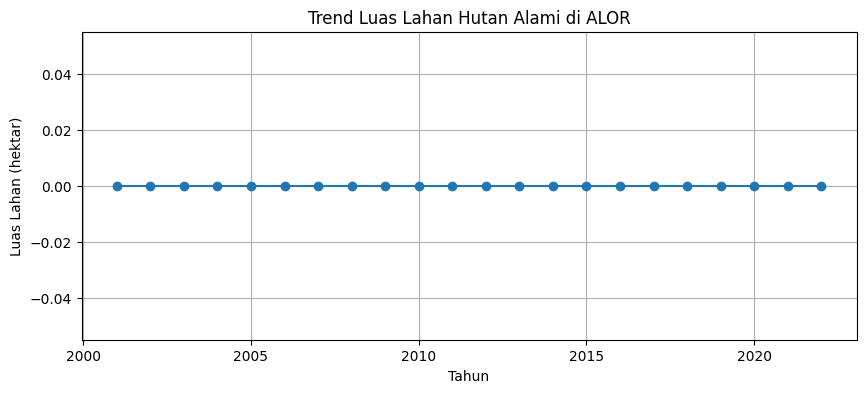


Data Luas Lahan untuk Wilayah: BANDA ACEH (KOTA)


,year,natural_forest_area_hectares
19,2001,0.0
508,2002,0.0
997,2003,0.0
1486,2004,0.0
1975,2005,0.0
2464,2006,0.0
2953,2007,0.0
3442,2008,0.0
3931,2009,0.0
4420,2010,0.0


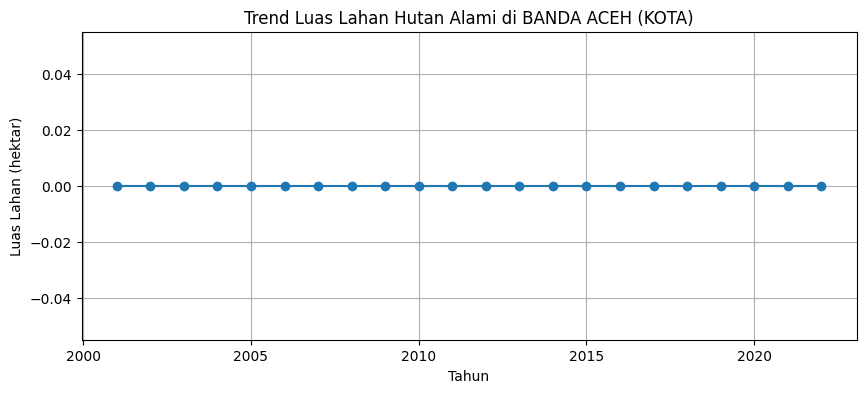


Data Luas Lahan untuk Wilayah: BANDAR LAMPUNG (KOTA)


,year,natural_forest_area_hectares
20,2001,0.0
509,2002,0.0
998,2003,0.0
1487,2004,0.0
1976,2005,0.0
2465,2006,0.0
2954,2007,0.0
3443,2008,0.0
3932,2009,0.0
4421,2010,0.0


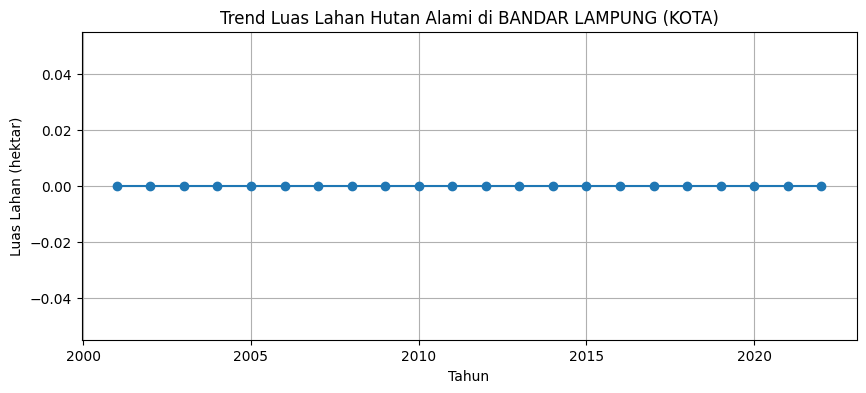


Perbandingan Statistik Deskriptif (dengan dan tanpa nilai 0)

Statistik Deskriptif (Termasuk Nilai 0):


,natural_forest_area_hectares
count,1.075800e+04
mean,1.881335e+05
std,4.533565e+05
min,0.000000e+00
25%,3.843282e+01
50%,1.264553e+04
75%,1.335595e+05
max,3.291772e+06



Statistik Deskriptif (Mengecualikan Nilai 0):


,natural_forest_area_hectares
count,8.844000e+03
mean,2.288490e+05
std,4.906110e+05
min,1.817647e-01
25%,2.328184e+03
50%,3.630564e+04
75%,1.977534e+05
max,3.291772e+06


In [ ]:
# Analisis Nilai Nol pada 'natural_forest_area_hectares'

# 1. Melihat persebaran nilai 0
print("\n===Analisis Nilai Nol pada 'natural_forest_area_hectares'===")

# Jumlah total baris dengan nilai 0 pada kolom luas lahan
count_zero_area = len(df[df['natural_forest_area_hectares'] == 0])
print(f"\nJumlah baris dengan luas lahan 0: {count_zero_area}")
print(f"Persentase baris dengan luas lahan 0: {(count_zero_area / len(df)) * 100:.2f}%")

# Melihat tahun-tahun di mana nilai 0 muncul
print("\nTahun-tahun dengan nilai luas lahan 0:")
print(df[df['natural_forest_area_hectares'] == 0]['year'].value_counts().sort_index())

# Melihat wilayah (region) di mana nilai 0 muncul paling sering
print("\nWilayah (region) dengan nilai luas lahan 0 terbanyak:")
print(df[df['natural_forest_area_hectares'] == 0]['region'].value_counts().head(10)) # Tampilkan 10 terbanyak

# Melihat parent region di mana nilai 0 muncul paling sering
print("\nParent Region dengan nilai luas lahan 0 terbanyak:")
print(df[df['natural_forest_area_hectares'] == 0]['parent_region'].value_counts().head(10)) # Tampilkan 10 terbanyak

# 2. Membandingkan dengan nilai lain (analisis per wilayah dari waktu ke waktu)
print("\nAnalisis Perubahan Luas Lahan dari Waktu ke Waktu di Wilayah dengan Nilai Nol")

# Ambil contoh wilayah yang memiliki nilai 0
regions_with_zero = df[df['natural_forest_area_hectares'] == 0]['region'].unique()

# Ambil beberapa contoh wilayah (misal 3 wilayah pertama) untuk dilihat detailnya
sample_regions_to_plot = regions_with_zero[:3]

for region in sample_regions_to_plot:
    print(f"\nData Luas Lahan untuk Wilayah: {region}")
    region_data = df[df['region'] == region].sort_values('year')
    display(region_data[['year', 'natural_forest_area_hectares']])

    # Visualisasi trend luas lahan per wilayah sampel
    plt.figure(figsize=(10, 4))
    plt.plot(region_data['year'], region_data['natural_forest_area_hectares'], marker='o')
    plt.title(f"Trend Luas Lahan Hutan Alami di {region}")
    plt.xlabel("Tahun")
    plt.ylabel("Luas Lahan (hektar)")
    plt.grid(True)
    plt.show()


# 3. Melihat data deskriptif (membandingkan dengan/tanpa nilai 0)
print("\nPerbandingan Statistik Deskriptif (dengan dan tanpa nilai 0)")

print("\nStatistik Deskriptif (Termasuk Nilai 0):")
display(df['natural_forest_area_hectares'].describe())

print("\nStatistik Deskriptif (Mengecualikan Nilai 0):")
# Filter DataFrame untuk mengecualikan baris dengan nilai 0 di kolom luas lahan
df_no_zero_area = df[df['natural_forest_area_hectares'] > 0]
display(df_no_zero_area['natural_forest_area_hectares'].describe())

### Data Preproccessing

Analisis Data Eksploratif (EDA) awal telah dilakukan pada dataset yang berisi data deret waktu tahunan mengenai luas hutan alam (dalam hektar) untuk setiap kabupaten/kota (region) di Indonesia. Data ini mencakup periode waktu yang telah diidentifikasi (misalnya, 2001 hingga 2022). Variabel kunci dalam dataset awal ini meliputi region (nama kabupaten/kota), parent_region (nama provinsi), year (tahun observasi), dan natural_forest_area_hectares (luas hutan alam di tingkat kabupaten/kota).

Tujuan dari keseluruhan tahap pra-pemrosesan ini adalah untuk mentransformasi, membersihkan, dan menyiapkan data awal tersebut ke dalam format yang optimal dan sesuai untuk dilatih menggunakan model deret waktu sekuensial seperti Long Short-Term Memory (LSTM) dan Gated Recurrent Unit (GRU) untuk melakukan prediksi pada tingkat provinsi.

#### **Tujuan Utama Pra-pemrosesan**

Pra-pemrosesan data merupakan langkah krusial sebelum melatih model machine learning, khususnya untuk model jaringan syaraf tiruan seperti LSTM/GRU. Tujuan utamanya meliputi:

* Mengubah granularitas data ke unit analisis yang diinginkan (provinsi).
* Memastikan kualitas dan konsistensi data pada unit analisis yang baru.
* Mentransformasi data ke dalam format numerik yang dapat diterima oleh model.
* Menskala fitur untuk meningkatkan stabilitas dan konvergensi pelatihan model.
* Membentuk data deret waktu menjadi sekuens input-output yang sesuai untuk pembelajaran terawasi (supervised learning).
* Membagi dataset secara proporsional dan kronologis untuk pelatihan, validasi, dan pengujian model yang objektif.

#### **Metodologi Preproccessing Dataset**  

Berikut adalah langkah-langkah metodologis utama yang akan dilakukan dalam tahap pra-pemrosesan data:

1. **Agregasi Data ke Tingkat Provinsi (Data Aggregation):** Langkah pertama adalah mengagregasi data luas hutan alam dari tingkat kabupaten/kota (region) ke tingkat provinsi (parent_region) untuk setiap tahunnya. Data dikelompokkan berdasarkan parent_region dan year, kemudian natural_forest_area_hectares dijumlahkan. DataFrame baru (df_provinsi_agg) dengan total luas hutan per provinsi per tahun.Langkah agregasi bertujuan untuk mengubah unit analisis ke tingkat provinsi, sesuai target prediksi model.


In [ ]:
print("\n--- Agregasi Luas Hutan ke Tingkat Provinsi per Tahun ---")

# Pastikan kolom-kolom yang diperlukan ada dan DataFrame sudah dimuat
if df is not None and \
   COL_YEAR in df.columns and \
   COL_PROVINCE in df.columns and \
   COL_FOREST_AREA in df.columns:

    print(f"Melakukan agregasi (penjumlahan) '{COL_FOREST_AREA}' berdasarkan '{COL_PROVINCE}' dan '{COL_YEAR}'.")

    # Cek tipe data sebelum agregasi
    if not pd.api.types.is_numeric_dtype(df[COL_FOREST_AREA]):
        print(f"PERINGATAN: Kolom '{COL_FOREST_AREA}' bukan numerik. Hasil agregasi mungkin tidak sesuai harapan.")
        # Anda mungkin perlu melakukan konversi tipe data lagi di sini jika ada masalah
        # df[COL_FOREST_AREA] = pd.to_numeric(df[COL_FOREST_AREA], errors='coerce')

    if not pd.api.types.is_numeric_dtype(df[COL_YEAR]):
        print(f"PERINGATAN: Kolom '{COL_YEAR}' bukan numerik. Hasil agregasi mungkin tidak sesuai harapan.")
        # df[COL_YEAR] = pd.to_numeric(df[COL_YEAR], errors='coerce')

    try:
        # Mengelompokkan data berdasarkan provinsi dan tahun, kemudian menjumlahkan luas hutan alam
        df_provinsi_agg = df.groupby([COL_PROVINCE, COL_YEAR])[COL_FOREST_AREA].sum(numeric_only=True).reset_index()

        # Mengganti nama kolom hasil penjumlahan agar lebih deskriptif
        # Misalnya, menjadi 'total_luas_hutan_provinsi_hektar'
        nama_kolom_agregat_baru = f'total_{COL_FOREST_AREA}_provinsi'
        df_provinsi_agg = df_provinsi_agg.rename(columns={COL_FOREST_AREA: nama_kolom_agregat_baru})

        print("\nAgregasi berhasil. DataFrame baru untuk tingkat provinsi ('df_provinsi_agg'):")

        print("\n(a) DataFrame Agregat Provinsi:")
        display(df_provinsi_agg.head())

        print("\n(b) Bentuk DataFrame Agregat Provinsi (baris, kolom):")
        print(df_provinsi_agg.shape)

        print("\n(c) Info DataFrame Agregat Provinsi:")
        df_provinsi_agg.info()

        print(f"\nDataFrame 'df_provinsi_agg' ini sekarang siap digunakan untuk analisis deret waktu dan prediksi di tingkat provinsi.")
        print(f"Setiap baris merepresentasikan total '{COL_FOREST_AREA}' untuk suatu '{COL_PROVINCE}' pada '{COL_YEAR}' tertentu.")

    except Exception as e:
        print(f"Terjadi error saat melakukan agregasi: {e}")
        df_provinsi_agg = None # Set ke None jika agregasi gagal

else:
    print("\nTidak dapat melakukan agregasi karena DataFrame 'df' belum dimuat atau kolom kunci tidak ditemukan.")
    df_provinsi_agg = None


--- Agregasi Luas Hutan ke Tingkat Provinsi per Tahun ---
Melakukan agregasi (penjumlahan) 'natural_forest_area_hectares' berdasarkan 'parent_region' dan 'year'.

Agregasi berhasil. DataFrame baru untuk tingkat provinsi ('df_provinsi_agg'):

(a) DataFrame Agregat Provinsi:


,parent_region,year,total_natural_forest_area_hectares_provinsi
0,ACEH,2001,3.624507e+06
1,ACEH,2002,3.621571e+06
2,ACEH,2003,3.615809e+06
3,ACEH,2004,3.610221e+06
4,ACEH,2005,3.600450e+06



(b) Bentuk DataFrame Agregat Provinsi (baris, kolom):
(748, 3)

(c) Info DataFrame Agregat Provinsi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 3 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parent_region                                748 non-null    object 
 1   year                                         748 non-null    int64  
 2   total_natural_forest_area_hectares_provinsi  748 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.7+ KB

DataFrame 'df_provinsi_agg' ini sekarang siap digunakan untuk analisis deret waktu dan prediksi di tingkat provinsi.
Setiap baris merepresentasikan total 'natural_forest_area_hectares' untuk suatu 'parent_region' pada 'year' tertentu.



Trend Total Luas Hutan per Provinsi (Contoh beberapa provinsi):


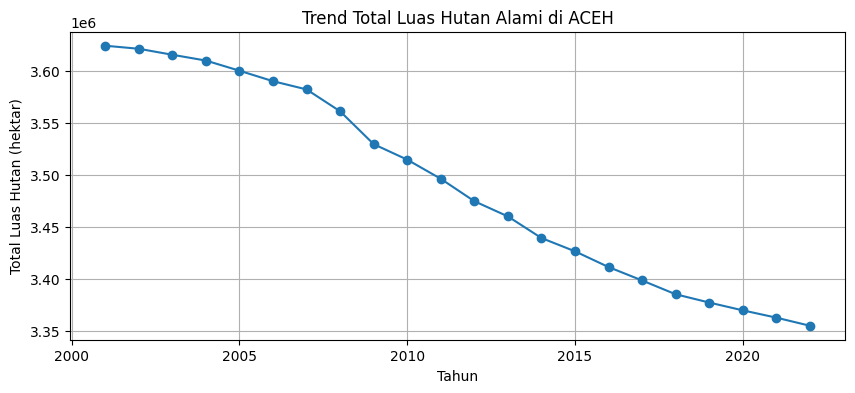

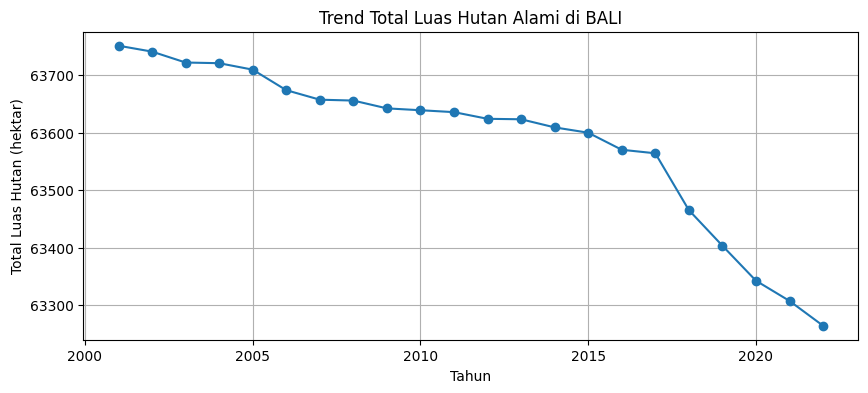

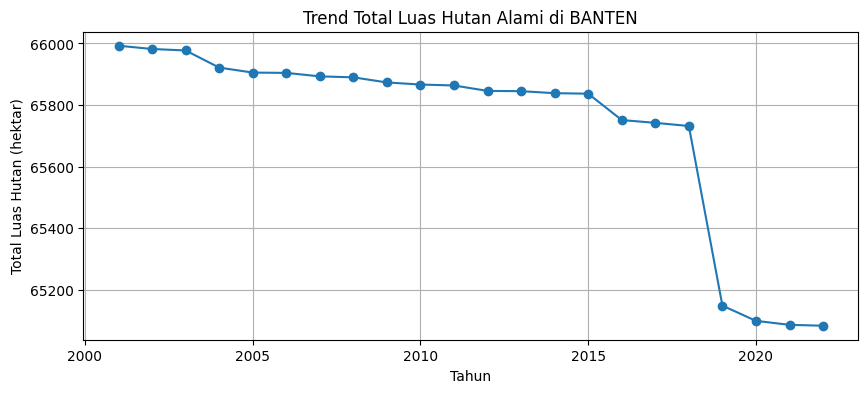

In [ ]:
# Melihat trend total luas hutan per provinsi dari waktu ke waktu
print("\nTrend Total Luas Hutan per Provinsi (Contoh beberapa provinsi):")
# Ambil beberapa contoh provinsi untuk visualisasi

# Pastikan df_provinsi_agg ada dan memiliki kolom yang dibutuhkan
if df_provinsi_agg is not None and \
   COL_YEAR in df_provinsi_agg.columns and \
   COL_PROVINCE in df_provinsi_agg.columns and \
   nama_kolom_agregat_baru in df_provinsi_agg.columns:

    sample_parent_regions = df_provinsi_agg[COL_PROVINCE].unique()[:3] # Ambil 3 provinsi pertama

    if len(sample_parent_regions) > 0:
        for parent_region in sample_parent_regions:
            plt.figure(figsize=(10, 4))
            # Gunakan nama kolom agregat yang baru
            provinsi_data = df_provinsi_agg[df_provinsi_agg[COL_PROVINCE] == parent_region].sort_values(COL_YEAR)
            plt.plot(provinsi_data[COL_YEAR], provinsi_data[nama_kolom_agregat_baru], marker='o')
            plt.title(f"Trend Total Luas Hutan Alami di {parent_region}")
            plt.xlabel("Tahun")
            plt.ylabel("Total Luas Hutan (hektar)") # Update label y
            plt.grid(True)
            plt.show()
    else:
        print("Tidak cukup provinsi unik dalam data agregat untuk diplot.")

else:
    print("\nTidak dapat membuat plot tren total luas hutan per provinsi. Pastikan DataFrame 'df_provinsi_agg' berhasil dibuat dan memiliki kolom-kolom yang diperlukan.")

2. **Validasi dan Pembersihan Data Lanjutan (pada Data Agregat Provinsi):** Setelah agregasi, `df_provinsi_agg` akan diperiksa untuk nilai yang hilang (NaN) pada kolom target dan ditangani jika ada.

In [ ]:
print("\n--- Mengecek Nilai yang Hilang pada DataFrame Agregat Provinsi ('df_provinsi_agg') ---")

# Pastikan df_provinsi_agg ada sebelum memeriksa nilai yang hilang
if df_provinsi_agg is not None:
    missing_values_agg = df_provinsi_agg.isnull().sum()
    missing_percentage_agg = (missing_values_agg / len(df_provinsi_agg)) * 100
    missing_df_agg = pd.DataFrame({'Jumlah Hilang': missing_values_agg, 'Persentase Hilang': missing_percentage_agg})

    # Cetak hanya kolom dengan nilai hilang
    print(missing_df_agg[missing_df_agg['Jumlah Hilang'] > 0])

    if missing_values_agg.sum() == 0:
        print("Tidak ada nilai yang hilang pada DataFrame agregat provinsi.")
    else:
        print("\nAda nilai yang hilang pada DataFrame agregat provinsi. Perlu ditangani.")

else:
    print("\nTidak dapat memeriksa nilai yang hilang karena DataFrame 'df_provinsi_agg' adalah None.")



--- Mengecek Nilai yang Hilang pada DataFrame Agregat Provinsi ('df_provinsi_agg') ---
Empty DataFrame
Columns: [Jumlah Hilang, Persentase Hilang]
Index: []
Tidak ada nilai yang hilang pada DataFrame agregat provinsi.


3. **Pengurutan Data (Data Sorting):**
Untuk setiap provinsi dalam `df_provinsi_agg`, data akan diurutkan secara kronologis berdasarkan kolom tahun `(COL_YEAR)`.

In [ ]:
# Urutkan data agregat berdasarkan provinsi dan tahun
print(f"\nMengurutkan DataFrame agregat provinsi berdasarkan '{COL_PROVINCE}' dan '{COL_YEAR}'...")
if df_provinsi_agg is not None:
    try:
        df_provinsi_agg = df_provinsi_agg.sort_values(by=[COL_PROVINCE, COL_YEAR]).reset_index(drop=True)
        print("\nPengurutan berhasil. Beberapa baris pertama setelah diurutkan:")
        display(df_provinsi_agg.head())
    except Exception as e:
        print(f"Terjadi error saat mengurutkan DataFrame: {e}")
else:
    print("\nTidak dapat mengurutkan karena DataFrame 'df_provinsi_agg' adalah None.")


Mengurutkan DataFrame agregat provinsi berdasarkan 'parent_region' dan 'year'...

Pengurutan berhasil. Beberapa baris pertama setelah diurutkan:


,parent_region,year,total_natural_forest_area_hectares_provinsi
0,ACEH,2001,3.624507e+06
1,ACEH,2002,3.621571e+06
2,ACEH,2003,3.615809e+06
3,ACEH,2004,3.610221e+06
4,ACEH,2005,3.600450e+06


4. **Encoding Fitur Kategorikal (Provinsi):** Kolom `COL_PROVINCE` dalam `df_provinsi_agg`, yang bersifat kategorikal, akan diubah menjadi representasi numerik yang dapat diproses oleh model LSTM/GRU. Metode encoding akan dipilih yaitu Entity Embeddings yang memetakan setiap provinsi ke vektor numerik berdimensi lebih rendah yang dapat dipelajari selama pelatihan model. Sangat direkomendasikan untuk variabel dengan banyak kategori. Kolom `COL_PROVINCE` akan digantikan atau ditambahkan dengan representasi numerik hasil encoding. Fitur ini akan menjadi bagian dari input model untuk membedakan data antar provinsi. Encoding dilakukan karena model jaringan syaraf tiruan memerlukan input numerik. Encoding memungkinkan model untuk menggunakan informasi provinsi secara efektif dalam pembelajarannya.

In [ ]:
import category_encoders as ce
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Ensure the DataFrame and required columns exist
if df_provinsi_agg is not None and COL_PROVINCE in df_provinsi_agg.columns and nama_kolom_agregat_baru in df_provinsi_agg.columns:

    print(f"\n--- Encoding Kolom '{COL_PROVINCE}' menggunakan Entity Embeddings ---")

    # 1. Siapkan Data untuk Embeddings (sementara)
    X_province_temp = df_provinsi_agg[COL_PROVINCE]
    y_forest_temp = df_provinsi_agg[nama_kolom_agregat_baru]

    # Label Encode Provinsi untuk Entity Embedding Input
    label_encoder = LabelEncoder()
    X_province_encoded_temp = label_encoder.fit_transform(X_province_temp)
    num_unique_provinces = len(label_encoder.classes_)
    print(f"Jumlah provinsi unik: {num_unique_provinces}")

    # Tentukan dimensi embedding
    # Aturan umum: min(50, jumlah_kategori // 2)
    embedding_dim = min(50, num_unique_provinces // 2)
    if embedding_dim == 0: # Handle case with very few provinces
        embedding_dim = 2
    print(f"Dimensi embedding yang dipilih: {embedding_dim}")

    # 2. Bangun dan Latih Model Sederhana untuk Mendapatkan Embeddings
    province_input = Input(shape=(1,), name=COL_PROVINCE)
    province_embedding = Embedding(input_dim=num_unique_provinces,
                                   output_dim=embedding_dim,
                                   input_length=1,
                                   name=f'{COL_PROVINCE}_embedding')(province_input)
    flatten = Flatten()(province_embedding)
    # Tambahkan layer Dense untuk memprediksi target (luas hutan) - ini hanya untuk melatih embedding
    dense1 = Dense(64, activation='relu')(flatten)
    output_layer = Dense(1)(dense1) # Output sesuai dengan dimensi target (luas hutan)

    embedding_model = Model(inputs=province_input, outputs=output_layer)
    embedding_model.compile(optimizer='adam', loss='mse') # Gunakan MSE karena target numerik

    print("\nModel Embedding Sederhana untuk Pelatihan:")
    embedding_model.summary()

    # Latih model sederhana
    print("\nMelatih model embedding sementara...")
    # Pastikan target y_forest_temp adalah array numpy float
    y_forest_temp_np = y_forest_temp.values.astype(np.float32)

    # Split data untuk pelatihan embedding (bisa saja tidak perlu split, tapi ini praktik yang baik)
    X_train_emb, X_val_emb, y_train_emb, y_val_emb = train_test_split(
        X_province_encoded_temp, y_forest_temp_np, test_size=0.2, random_state=42
    )

    history = embedding_model.fit(X_train_emb, y_train_emb,
                                  validation_data=(X_val_emb, y_val_emb),
                                  epochs=10,
                                  batch_size=32,
                                  verbose=0)
    print("Pelatihan model embedding sementara selesai.")

    # 3. Ambil Bobot Embedding
    province_embeddings = embedding_model.get_layer(f'{COL_PROVINCE}_embedding').get_weights()[0]
    print(f"\nBentuk bobot embedding provinsi: {province_embeddings.shape}") # (jumlah_provinsi, embedding_dim)

    # 4. Petakan Bobot Embedding Kembali ke DataFrame Asli
    embedding_dict = {}
    for i, province_name in enumerate(label_encoder.classes_):
        embedding_dict[province_name] = province_embeddings[i]

    # Buat kolom baru di df_provinsi_agg untuk menyimpan vektor embedding
    df_provinsi_agg[f'{COL_PROVINCE}_embedding'] = df_provinsi_agg[COL_PROVINCE].apply(lambda x: embedding_dict[x])

    print(f"\nKolom '{COL_PROVINCE}_embedding' ditambahkan ke df_provinsi_agg.")
    print("Beberapa baris pertama dengan kolom embedding baru:")
    display(df_provinsi_agg.head())

    # Memisahkan menjadi kolom terpisah
    embedding_columns = [f'{COL_PROVINCE}_emb_{i+1}' for i in range(embedding_dim)]
    df_provinsi_agg[embedding_columns] = pd.DataFrame(df_provinsi_agg[f'{COL_PROVINCE}_embedding'].tolist(), index=df_provinsi_agg.index)

    # Hapus kolom embedding asli jika sudah dipisah
    df_provinsi_agg = df_provinsi_agg.drop(columns=[f'{COL_PROVINCE}_embedding'])

    print(f"\nVektor embedding provinsi dipisahkan menjadi kolom terpisah: {embedding_columns}")
    print("DataFrame setelah pemisahan kolom embedding:")
    display(df_provinsi_agg.head())

else:
    print(f"\nEncoding tidak dapat dilakukan karena DataFrame 'df_provinsi_agg' adalah None atau kolom '{COL_PROVINCE}' atau '{nama_kolom_agregat_baru}' tidak ditemukan.")


--- Encoding Kolom 'parent_region' menggunakan Entity Embeddings ---
Jumlah provinsi unik: 34
Dimensi embedding yang dipilih: 17

Model Embedding Sederhana untuk Pelatihan:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ parent_region (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ parent_region_embedding         │ (None, 1, 17)          │           578 │
│ (Embedding)                     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,795 (7.01 KB)

 Trainable params: 1,795 (7.01 KB)

 Non-trainable params: 0 (0.00 B)


Melatih model embedding sementara...
Pelatihan model embedding sementara selesai.

Bentuk bobot embedding provinsi: (34, 17)

Kolom 'parent_region_embedding' ditambahkan ke df_provinsi_agg.
Beberapa baris pertama dengan kolom embedding baru:


,parent_region,year,total_natural_forest_area_hectares_provinsi,parent_region_emb_1,parent_region_emb_2,parent_region_emb_3,parent_region_emb_4,parent_region_emb_5,parent_region_emb_6,parent_region_emb_7,...,parent_region_emb_9,parent_region_emb_10,parent_region_emb_11,parent_region_emb_12,parent_region_emb_13,parent_region_emb_14,parent_region_emb_15,parent_region_emb_16,parent_region_emb_17,parent_region_embedding
0,ACEH,2001,3.624507e+06,-0.320343,-0.248462,-0.298426,-0.193704,-0.181322,0.270897,0.26074,...,-0.327168,0.240367,0.19619,-0.317342,-0.262453,0.343256,0.324176,0.197827,0.298899,"[0.30686843, -0.2853451, -0.3125714, -0.256236..."
1,ACEH,2002,3.621571e+06,-0.320343,-0.248462,-0.298426,-0.193704,-0.181322,0.270897,0.26074,...,-0.327168,0.240367,0.19619,-0.317342,-0.262453,0.343256,0.324176,0.197827,0.298899,"[0.30686843, -0.2853451, -0.3125714, -0.256236..."
2,ACEH,2003,3.615809e+06,-0.320343,-0.248462,-0.298426,-0.193704,-0.181322,0.270897,0.26074,...,-0.327168,0.240367,0.19619,-0.317342,-0.262453,0.343256,0.324176,0.197827,0.298899,"[0.30686843, -0.2853451, -0.3125714, -0.256236..."
3,ACEH,2004,3.610221e+06,-0.320343,-0.248462,-0.298426,-0.193704,-0.181322,0.270897,0.26074,...,-0.327168,0.240367,0.19619,-0.317342,-0.262453,0.343256,0.324176,0.197827,0.298899,"[0.30686843, -0.2853451, -0.3125714, -0.256236..."
4,ACEH,2005,3.600450e+06,-0.320343,-0.248462,-0.298426,-0.193704,-0.181322,0.270897,0.26074,...,-0.327168,0.240367,0.19619,-0.317342,-0.262453,0.343256,0.324176,0.197827,0.298899,"[0.30686843, -0.2853451, -0.3125714, -0.256236..."



Vektor embedding provinsi dipisahkan menjadi kolom terpisah: ['parent_region_emb_1', 'parent_region_emb_2', 'parent_region_emb_3', 'parent_region_emb_4', 'parent_region_emb_5', 'parent_region_emb_6', 'parent_region_emb_7', 'parent_region_emb_8', 'parent_region_emb_9', 'parent_region_emb_10', 'parent_region_emb_11', 'parent_region_emb_12', 'parent_region_emb_13', 'parent_region_emb_14', 'parent_region_emb_15', 'parent_region_emb_16', 'parent_region_emb_17']
DataFrame setelah pemisahan kolom embedding:


,parent_region,year,total_natural_forest_area_hectares_provinsi,parent_region_emb_1,parent_region_emb_2,parent_region_emb_3,parent_region_emb_4,parent_region_emb_5,parent_region_emb_6,parent_region_emb_7,parent_region_emb_8,parent_region_emb_9,parent_region_emb_10,parent_region_emb_11,parent_region_emb_12,parent_region_emb_13,parent_region_emb_14,parent_region_emb_15,parent_region_emb_16,parent_region_emb_17
0,ACEH,2001,3.624507e+06,0.306868,-0.285345,-0.312571,-0.256237,-0.266567,-0.264789,-0.243685,0.315674,0.325105,-0.268168,-0.252763,0.246785,-0.336324,0.308406,0.266261,0.247692,0.315084
1,ACEH,2002,3.621571e+06,0.306868,-0.285345,-0.312571,-0.256237,-0.266567,-0.264789,-0.243685,0.315674,0.325105,-0.268168,-0.252763,0.246785,-0.336324,0.308406,0.266261,0.247692,0.315084
2,ACEH,2003,3.615809e+06,0.306868,-0.285345,-0.312571,-0.256237,-0.266567,-0.264789,-0.243685,0.315674,0.325105,-0.268168,-0.252763,0.246785,-0.336324,0.308406,0.266261,0.247692,0.315084
3,ACEH,2004,3.610221e+06,0.306868,-0.285345,-0.312571,-0.256237,-0.266567,-0.264789,-0.243685,0.315674,0.325105,-0.268168,-0.252763,0.246785,-0.336324,0.308406,0.266261,0.247692,0.315084
4,ACEH,2005,3.600450e+06,0.306868,-0.285345,-0.312571,-0.256237,-0.266567,-0.264789,-0.243685,0.315674,0.325105,-0.268168,-0.252763,0.246785,-0.336324,0.308406,0.266261,0.247692,0.315084


5. **Penskalaan Fitur Numerik (Feature Scaling):** Variabel target `(total_luas_hutan_provinsi_hektar)` dan fitur numerik lainnya (jika ada, selain hasil encoding yang mungkin tidak perlu diskalakan seperti one-hot) dalam `df_provinsi_agg` akan diskalakan menggunakan MinMaxScaler.

In [ ]:
numerical_cols_to_scale = [nama_kolom_agregat_baru] # Add other numerical columns if any

# Ensure the DataFrame and required columns exist before scaling
if df_provinsi_agg is not None and all(col in df_provinsi_agg.columns for col in numerical_cols_to_scale):

    print(f"\n--- Melakukan Penskalaan Fitur Numerik menggunakan MinMaxScaler ---")
    print(f"Kolom yang akan diskalakan: {numerical_cols_to_scale}")

    # Inisialisasi MinMaxScaler
    scaler = MinMaxScaler()

    # Lakukan penskalaan
    # Simpan scaler jika perlu melakukan inverse_transform nanti untuk prediksi
    df_provinsi_agg[numerical_cols_to_scale] = scaler.fit_transform(df_provinsi_agg[numerical_cols_to_scale])

    print("\nPenskalaan fitur numerik berhasil.")
    print("DataFrame setelah penskalaan:")
    display(df_provinsi_agg.head())

else:
    print(f"\nPenskalaan tidak dapat dilakukan karena DataFrame 'df_provinsi_agg' adalah None atau kolom yang akan diskalakan tidak ditemukan.")
    # Inisialisasi scaler sebagai None jika scaling gagal
    scaler = None


--- Melakukan Penskalaan Fitur Numerik menggunakan MinMaxScaler ---
Kolom yang akan diskalakan: ['total_natural_forest_area_hectares_provinsi']

Penskalaan fitur numerik berhasil.
DataFrame setelah penskalaan:


,parent_region,year,total_natural_forest_area_hectares_provinsi,parent_region_emb_1,parent_region_emb_2,parent_region_emb_3,parent_region_emb_4,parent_region_emb_5,parent_region_emb_6,parent_region_emb_7,parent_region_emb_8,parent_region_emb_9,parent_region_emb_10,parent_region_emb_11,parent_region_emb_12,parent_region_emb_13,parent_region_emb_14,parent_region_emb_15,parent_region_emb_16,parent_region_emb_17
0,ACEH,2001,0.143209,0.306868,-0.285345,-0.312571,-0.256237,-0.266567,-0.264789,-0.243685,0.315674,0.325105,-0.268168,-0.252763,0.246785,-0.336324,0.308406,0.266261,0.247692,0.315084
1,ACEH,2002,0.143093,0.306868,-0.285345,-0.312571,-0.256237,-0.266567,-0.264789,-0.243685,0.315674,0.325105,-0.268168,-0.252763,0.246785,-0.336324,0.308406,0.266261,0.247692,0.315084
2,ACEH,2003,0.142866,0.306868,-0.285345,-0.312571,-0.256237,-0.266567,-0.264789,-0.243685,0.315674,0.325105,-0.268168,-0.252763,0.246785,-0.336324,0.308406,0.266261,0.247692,0.315084
3,ACEH,2004,0.142645,0.306868,-0.285345,-0.312571,-0.256237,-0.266567,-0.264789,-0.243685,0.315674,0.325105,-0.268168,-0.252763,0.246785,-0.336324,0.308406,0.266261,0.247692,0.315084
4,ACEH,2005,0.142259,0.306868,-0.285345,-0.312571,-0.256237,-0.266567,-0.264789,-0.243685,0.315674,0.325105,-0.268168,-0.252763,0.246785,-0.336324,0.308406,0.266261,0.247692,0.315084


6. **Pembentukan Sekuens Data (Sequence Generation):** Data deret waktu provinsi (termasuk fitur total_luas_hutan_provinsi_hektar yang telah diskalakan dan fitur provinsi yang telah di-encode) akan ditransformasikan menjadi format sekuens input-output dengan look-back window.

In [ ]:
# Function to create sequences
def create_sequences(df, look_back, target_col, region_col, feature_cols):
    X, y = [], []
    grouped = df.groupby(region_col)

    for name, group in grouped:
        data = group[feature_cols + [target_col]].values  # Include target in data to create sequences

        for i in range(len(data) - look_back):
            # Input sequence: data from time step i to i + look_back
            # Features excluding the target for the next step
            seq_x = data[i:(i + look_back), :-1] # Take all feature columns (excluding target) for look_back steps

            # Target: the target value at time step i + look_back
            seq_y = data[i + look_back, -1] # Take the target column at the step AFTER the sequence ends

            X.append(seq_x)
            y.append(seq_y)

    return np.array(X), np.array(y)

# Define the look-back window size
look_back_window = 3 # Example: Use the past 3 years to predict the next year

# Ensure df_provinsi_agg is valid and required columns exist
if df_provinsi_agg is not None and nama_kolom_agregat_baru in df_provinsi_agg.columns and COL_PROVINCE in df_provinsi_agg.columns:

    print(f"\n--- Pembentukan Sekuens Data dengan Look-back Window {look_back_window} ---")

    # Identify feature columns
    # Exclude year and the original province name, include embedding columns and scaled target
    feature_columns = [col for col in df_provinsi_agg.columns if col not in [COL_YEAR, COL_PROVINCE, nama_kolom_agregat_baru]]
    # Add the scaled target column itself to the feature columns to be included in the sequence
    # This is because the scaled target value from previous steps is a feature for predicting the next step
    feature_columns.append(nama_kolom_agregat_baru)


    print(f"Menggunakan kolom-kolom berikut sebagai fitur dalam sekuens: {feature_columns}")
    print(f"Kolom target: {nama_kolom_agregat_baru}")

    # Create sequences
    try:
        X_sequences, y_targets = create_sequences(
            df_provinsi_agg,
            look_back=look_back_window,
            target_col=nama_kolom_agregat_baru,
            region_col=COL_PROVINCE,
            feature_cols=[col for col in feature_columns if col != nama_kolom_agregat_baru] # Pass features excluding the target itself for sequence creation logic
        )

        print("\nPembentukan sekuens berhasil.")
        print(f"Bentuk input sekuens (X_sequences): {X_sequences.shape}")
        print(f"Bentuk target (y_targets): {y_targets.shape}")

        print("\nContoh satu input sekuens (X_sequences[0]):")
        display(X_sequences[0])

        print("\nContoh satu target (y_targets[0]):")
        display(y_targets[0])


    except Exception as e:
        print(f"Terjadi error saat membentuk sekuens: {e}")
        X_sequences = None
        y_targets = None

else:
    print("\nPembentukan sekuens tidak dapat dilakukan karena DataFrame 'df_provinsi_agg' adalah None atau kolom yang diperlukan tidak ditemukan.")
    X_sequences = None
    y_targets = None


--- Pembentukan Sekuens Data dengan Look-back Window 3 ---
Menggunakan kolom-kolom berikut sebagai fitur dalam sekuens: ['parent_region_emb_1', 'parent_region_emb_2', 'parent_region_emb_3', 'parent_region_emb_4', 'parent_region_emb_5', 'parent_region_emb_6', 'parent_region_emb_7', 'parent_region_emb_8', 'parent_region_emb_9', 'parent_region_emb_10', 'parent_region_emb_11', 'parent_region_emb_12', 'parent_region_emb_13', 'parent_region_emb_14', 'parent_region_emb_15', 'parent_region_emb_16', 'parent_region_emb_17', 'total_natural_forest_area_hectares_provinsi']
Kolom target: total_natural_forest_area_hectares_provinsi

Pembentukan sekuens berhasil.
Bentuk input sekuens (X_sequences): (646, 3, 17)
Bentuk target (y_targets): (646,)

Contoh satu input sekuens (X_sequences[0]):


array([[ 0.30686843, -0.28534511, -0.31257141, -0.2562367 , -0.26656729,
        -0.26478854, -0.2436852 ,  0.31567368,  0.32510456, -0.26816833,
        -0.25276333,  0.246785  , -0.33632439,  0.30840591,  0.26626095,
         0.24769211,  0.31508425],
       [ 0.30686843, -0.28534511, -0.31257141, -0.2562367 , -0.26656729,
        -0.26478854, -0.2436852 ,  0.31567368,  0.32510456, -0.26816833,
        -0.25276333,  0.246785  , -0.33632439,  0.30840591,  0.26626095,
         0.24769211,  0.31508425],
       [ 0.30686843, -0.28534511, -0.31257141, -0.2562367 , -0.26656729,
        -0.26478854, -0.2436852 ,  0.31567368,  0.32510456, -0.26816833,
        -0.25276333,  0.246785  , -0.33632439,  0.30840591,  0.26626095,
         0.24769211,  0.31508425]])


Contoh satu target (y_targets[0]):


np.float64(0.1426448345988152)

## 7. **Pembagian Data (Data Splitting):** Dataset sekuens akan dibagi secara kronologis menjadi data pelatihan, data validasi, dan data pengujian.

In [ ]:
# Ensure sequences were successfully created
if X_sequences is not None and y_targets is not None:

    print("\n--- Pembagian Data Menjadi Training, Validation, dan Testing (Secara Kronologis) ---")

    # Redo sequence creation to associate year and region
    def create_sequences_with_info(df, look_back, target_col, region_col, year_col, feature_cols):
        X, y, regions, years = [], [], [], []
        grouped = df.groupby(region_col)

        # Ensure feature_cols actually exist in the dataframe group
        # Add target_col to features for extraction within the loop, but exclude it from actual seq_x
        all_cols_for_seq = feature_cols + [target_col]

        for name, group in grouped:
            # Ensure the group contains all necessary columns
            if not all(col in group.columns for col in all_cols_for_seq + [year_col]):
                print(f"Skipping region {name} due to missing columns.")
                continue

            data = group[all_cols_for_seq].values
            year_data = group[year_col].values

            for i in range(len(data) - look_back):
                # Input sequence: data from time step i to i + look_back
                # Features excluding the target for the next step
                seq_x = data[i:(i + look_back), :-1] # Take all feature columns (excluding target) for look_back steps

                # Target: the target value at time step i + look_back
                seq_y = data[i + look_back, -1] # Take the target column at the step AFTER the sequence ends

                # Get the year for the target (this is the year being predicted)
                target_year = year_data[i + look_back]

                X.append(seq_x)
                y.append(seq_y)
                regions.append(name)
                years.append(target_year)

        return np.array(X), np.array(y), np.array(regions), np.array(years)


    print(f"\nRe-creating sequences to include year and region information...")

    # Identify feature columns EXCLUDING the target itself for the function parameter
    feature_columns_for_func = [col for col in df_provinsi_agg.columns if col not in [COL_YEAR, COL_PROVINCE, nama_kolom_agregat_baru]]

    X_sequences_info, y_targets_info, sequence_regions, sequence_years = create_sequences_with_info(
        df_provinsi_agg,
        look_back=look_back_window,
        target_col=nama_kolom_agregat_baru,
        region_col=COL_PROVINCE,
        year_col=COL_YEAR,
        feature_cols=feature_columns_for_func
    )

    print("\nSequence re-creation with info successful.")
    print(f"Bentuk input sekuens (X_sequences_info): {X_sequences_info.shape}")
    print(f"Bentuk target (y_targets_info): {y_targets_info.shape}")
    print(f"Bentuk region per sekuens: {sequence_regions.shape}")
    print(f"Bentuk tahun target per sekuens: {sequence_years.shape}")


    # Now, split based on years
    # Determine the years range
    min_year = sequence_years.min()
    max_year = sequence_years.max()
    print(f"\nRange tahun target dalam sekuens: {min_year} - {max_year}")

    # Define the split points (e.g., 70% train, 15% val, 15% test)
    total_years = max_year - min_year + 1
    train_years_end = min_year + int(total_years * 0.7) -1 # Year up to which training data goes
    val_years_end = train_years_end + int(total_years * 0.15) # Year up to which validation data goes

    # Adjust for potential rounding issues to ensure all years are covered
    if val_years_end >= max_year:
         val_years_end = max_year - 1 # Ensure there's at least one year for testing

    if train_years_end >= val_years_end:
         train_years_end = val_years_end - 1 # Ensure there's at least one year for validation

    print(f"Tahun akhir untuk data training: <= {train_years_end}")
    print(f"Tahun akhir untuk data validation: <= {val_years_end} (Data testing > {val_years_end})")


    # Create boolean masks for splitting
    train_mask = sequence_years <= train_years_end
    val_mask = (sequence_years > train_years_end) & (sequence_years <= val_years_end)
    test_mask = sequence_years > val_years_end

    # Apply masks to split the data
    X_train = X_sequences_info[train_mask]
    y_train = y_targets_info[train_mask]
    regions_train = sequence_regions[train_mask]
    years_train = sequence_years[train_mask]

    X_val = X_sequences_info[val_mask]
    y_val = y_targets_info[val_mask]
    regions_val = sequence_regions[val_mask]
    years_val = sequence_years[val_mask]

    X_test = X_sequences_info[test_mask]
    y_test = y_targets_info[test_mask]
    regions_test = sequence_regions[test_mask]
    years_test = sequence_years[test_mask]


    print("\nPembagian data berhasil.")
    print(f"Bentuk Data Training (X_train, y_train): {X_train.shape}, {y_train.shape}")
    print(f"Bentuk Data Validation (X_val, y_val): {X_val.shape}, {y_val.shape}")
    print(f"Bentuk Data Testing (X_test, y_test): {X_test.shape}, {y_test.shape}")

    # Verify the year ranges in each split
    if len(years_train) > 0:
        print(f"Tahun target di Training: {years_train.min()} - {years_train.max()}")
    if len(years_val) > 0:
        print(f"Tahun target di Validation: {years_val.min()} - {years_val.max()}")
    if len(years_test) > 0:
        print(f"Tahun target di Testing: {years_test.min()} - {years_test.max()}")

else:
    print("\nPembagian data tidak dapat dilakukan karena sekuens (X_sequences, y_targets) belum berhasil dibuat.")


--- Pembagian Data Menjadi Training, Validation, dan Testing (Secara Kronologis) ---

Re-creating sequences to include year and region information...

Sequence re-creation with info successful.
Bentuk input sekuens (X_sequences_info): (646, 3, 17)
Bentuk target (y_targets_info): (646,)
Bentuk region per sekuens: (646,)
Bentuk tahun target per sekuens: (646,)

Range tahun target dalam sekuens: 2004 - 2022
Tahun akhir untuk data training: <= 2016
Tahun akhir untuk data validation: <= 2018 (Data testing > 2018)

Pembagian data berhasil.
Bentuk Data Training (X_train, y_train): (442, 3, 17), (442,)
Bentuk Data Validation (X_val, y_val): (68, 3, 17), (68,)
Bentuk Data Testing (X_test, y_test): (136, 3, 17), (136,)
Tahun target di Training: 2004 - 2016
Tahun target di Validation: 2017 - 2018
Tahun target di Testing: 2019 - 2022
